# Capstone Project Module 2: Supermarket Customer Analysis

**Rumusan Masalah:** Mengidentifikasi karakteristik pelanggan yang paling mungkin merespons campaign promosi di masa mendatang.

## 1. Background
Dalam era persaingan bisnis ritel yang semakin ketat, pemanfaatan data pelanggan menjadi salah satu kunci untuk meningkatkan efektivitas strategi pemasaran. Supermarket modern tidak hanya mengandalkan lokasi fisik, tetapi juga kanal digital seperti website dan katalog dalam menjangkau konsumennya. Oleh karena itu, penting bagi perusahaan untuk memahami karakteristik dan perilaku pelanggan, terutama dalam merespons campaign promosi.

Dataset ini memberikan informasi lengkap mengenai demografi pelanggan, kebiasaan berbelanja, kanal pembelian, serta respons terhadap berbagai campaign promosi yang telah dilakukan dalam dua tahun terakhir. Dengan menganalisis data ini, perusahaan dapat menyusun strategi promosi yang lebih terarah dan meningkatkan tingkat konversi campaign di masa mendatang.

### Problem Statement
1. Bagaimana karakteristik demografis dan perilaku pelanggan yang merespons kampanye pemasaran?
2. Fitur atau variabel apa yang paling berpengaruh terhadap keberhasilan kampanye?
3. Bagaimana cara supermarket meningkatkan efektivitas campaign berdasarkan data pelanggan?

### 🎯 Objective
1. Mendeskripsikan karakteristik pelanggan berdasarkan campaign response.
2.	Menentukan fitur-fitur yang paling berkorelasi dengan campaign success.
3.	Memberikan actionable recommendation bagi supermarket untuk meningkatkan efektivitas campaign.

## 2. Data Overview

In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import skew
from scipy.stats import ttest_ind



df = pd.read_csv('SupermarketCustomers.csv', sep='\t')
# Ukuran dataset
print("Jumlah baris dan kolom:", df.shape)

# Tipe data per kolom
print("\n Tipe Data Tiap Kolom:")
print(df.dtypes)

# Missing values
df.isnull().sum()[df.isnull().sum() > 0]


Jumlah baris dan kolom: (2240, 29)

 Tipe Data Tiap Kolom:
ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object


Income    24
dtype: int64

In [190]:
# Statistik deskriptif untuk numerik
print("\nStatistik Deskriptif:")
df.describe()



Statistik Deskriptif:


,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


### Eksplorasi Awal Dataset

Berdasarkan hasil eksplorasi awal terhadap dataset, diperoleh informasi sebagai berikut:

- Dataset terdiri dari **2.240 baris** dan **29 kolom**, yang mencerminkan data pelanggan supermarket beserta perilaku belanja dan respons mereka terhadap campaign promosi.
- Tipe data tiap kolom telah sesuai dengan konteksnya, di mana kolom numerik seperti `Income`, `Recency`, dan `MntWines` bertipe numerik, sedangkan kolom kategorikal seperti `Education` dan `Marital_Status` bertipe object.
- Terdapat **24 nilai kosong pada kolom `Income`**, yang akan ditangani pada tahap data cleaning.
- Statistik deskriptif menunjukkan adanya variasi besar dalam pengeluaran pelanggan terhadap produk tertentu. Misalnya, pelanggan menghabiskan rata-rata sekitar **$304** untuk pembelian wine dalam dua tahun terakhir, dengan pengeluaran maksimal mencapai **$1.493**. Hal ini mengindikasikan adanya perbedaan preferensi belanja yang cukup signifikan antar pelanggan.

## 3. Data Cleaning

In [191]:
# Hitung jumlah dan persentase missing value
print(f"Persentase missing value pada kolom Income: {df['Income'].isna().sum() / df.shape[0] * 100:.2f}%")

Persentase missing value pada kolom Income: 1.07%


In [220]:
# Hapus baris dengan nilai Income kosong
df_clean = df.dropna(subset=['Income'])
print("Jumlah baris setelah penghapusan:", df_clean.shape)

Jumlah baris setelah penghapusan: (2216, 29)


In [193]:
# Reset index setelah penghapusan baris
df_clean.reset_index(drop=True, inplace=True)

In [194]:
print("Jumlah duplikat:", df_clean.duplicated().sum())

Jumlah duplikat: 0


In [195]:
# Ubah kolom tanggal menjadi datetime
df_clean = df.dropna(subset=['Income']).copy()
df_clean['Dt_Customer'] = pd.to_datetime(df_clean['Dt_Customer'], format="%d-%m-%Y")

In [196]:
# Ekspor DataFrame df_clean ke file CSV
df_clean.to_csv("cleaned_supermarket_data.csv", index=False, encoding='utf-8')

### Data Cleaning

Beberapa langkah pembersihan data dilakukan sebagai berikut:

1. **Menghapus 24 baris** dengan missing value pada kolom `Income` (~1.07% dari total data).
2. **Index direset** setelah pembersihan agar data lebih rapi.
3.  **Tidak ditemukan duplikat** dalam dataset.
4. **Mengonversi kolom `Dt_Customer`** menjadi format tanggal agar dapat digunakan untuk analisis.

## 4. Descriptive Statistics

**Tujuan tahap ini adalah untuk:**
1.	Mendeskripsikan karakteristik pelanggan berdasarkan data numerik dan kategorikal.
2.	Memberikan gambaran awal yang relevan terhadap Response (respon terhadap campaign).
3.	Menyiapkan dasar untuk analisis hubungan dan rekomendasi bisnis.

**Kriteria Pemilihan Fitur:**
Fitur yang dianalisis dipilih berdasarkan:
- Potensi keterkaitannya dengan campaign response secara logis.
- Relevansi dengan konteks bisnis (aktivitas belanja, engagement, daya beli).
- Tersedianya variasi nilai yang cukup untuk dianalisis secara statistik.

**Fitur Numerik yang Dianalisis**
- `Income` Mewakili daya beli pelangga
- `MntWines` Salah satu produk utama yang mewakili minat belanaja
- `Recency` Mengindikasikan waktu sejak pembelian terakhir (engagement)
- ` NumDealsPurchases` Menunjukkan sensitivitas pelanggan terhaadp promosi
- `NumWebVisitMonth` Menunjukkan keterlibatan pelanggan secara digital


### 4.1. Income

In [197]:
df_clean['Income'].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

In [198]:
# Hitung proporsi pelanggan yang merespons campaign
total = df_clean.shape[0]
response_counts = df_clean['Response'].value_counts()
respon = response_counts[1]
proporsi_respon = respon / total * 100

print(f"Dari total {total} pelanggan, sebanyak {respon} pelanggan merespons campaign ({proporsi_respon:.2f}%).")

Dari total 2216 pelanggan, sebanyak 333 pelanggan merespons campaign (15.03%).


In [199]:
print("Skewness Income:", skew(df_clean['Income']))

Skewness Income: 6.758908338860741


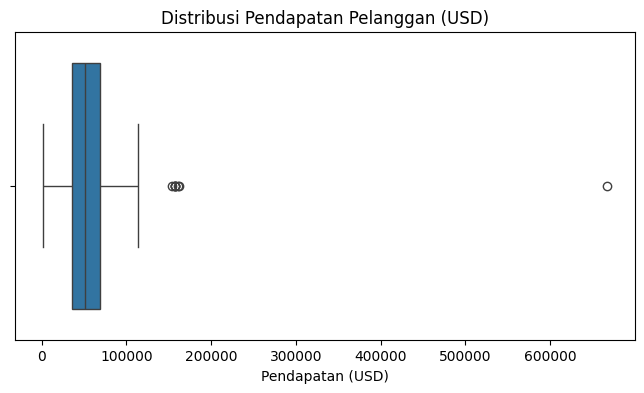

In [200]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_clean['Income'])
plt.title("Distribusi Pendapatan Pelanggan (USD)")
plt.xlabel("Pendapatan (USD)")
plt.show()

 Insight:
* Sebagian besar pelanggan memiliki pendapatan antara 35 ribu USD hingga 68 ribu USD, dengan median mendekati 51 ribu.
* Namun, terdapat outlier ekstrem (666.666), yang sangat jauh dari rata-rata — ini menyebabkan distribusi condong ke kanan    (positively skewed).
* Nilai maksimum sangat tinggi (666.666), jauh di atas Q3, menandakan adanya **outlier** dan menyebabkan distribusi **positively skewed secara statistik**.

* Penting bagi supermarket untuk menganalisis segmen pelanggan dengan pendapatan tinggi, karena mereka bisa memiliki daya beli lebih tinggi dan strategi kampanye berbeda.

### 4.2. MntWines (Total Pengeluaran Untuk WIne)

In [201]:
df_clean['MntWines'].describe()

count    2216.000000
mean      305.091606
std       337.327920
min         0.000000
25%        24.000000
50%       174.500000
75%       505.000000
max      1493.000000
Name: MntWines, dtype: float64

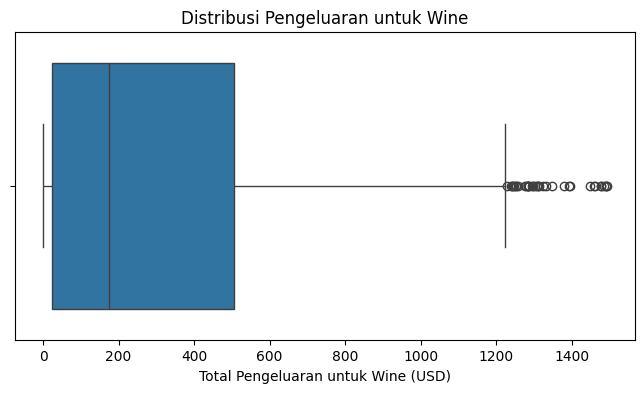

In [202]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_clean['MntWines'])
plt.title("Distribusi Pengeluaran untuk Wine")
plt.xlabel("Total Pengeluaran untuk Wine (USD)")
plt.show()

Insight:
* Sebagian besar pelanggan mengeluarkan kurang dari $500 untuk wine, bahkan banyak yang **tidak membeli sama sekali (nilai 0)**.
* Skewness positif menunjukkan **beberapa pelanggan sangat loyal atau konsumtif terhadap wine**.
* Fitur ini relevan untuk dianalisis terhadap variabel `Response` untuk melihat apakah pelanggan wine cenderung merespons campaign atau tidak.

### 4.3 Recency

count    2240.000000
mean       49.109375
std        28.962453
min         0.000000
25%        24.000000
50%        49.000000
75%        74.000000
max        99.000000
Name: Recency, dtype: float64

Skewness Recency: -0.0019866586335935076


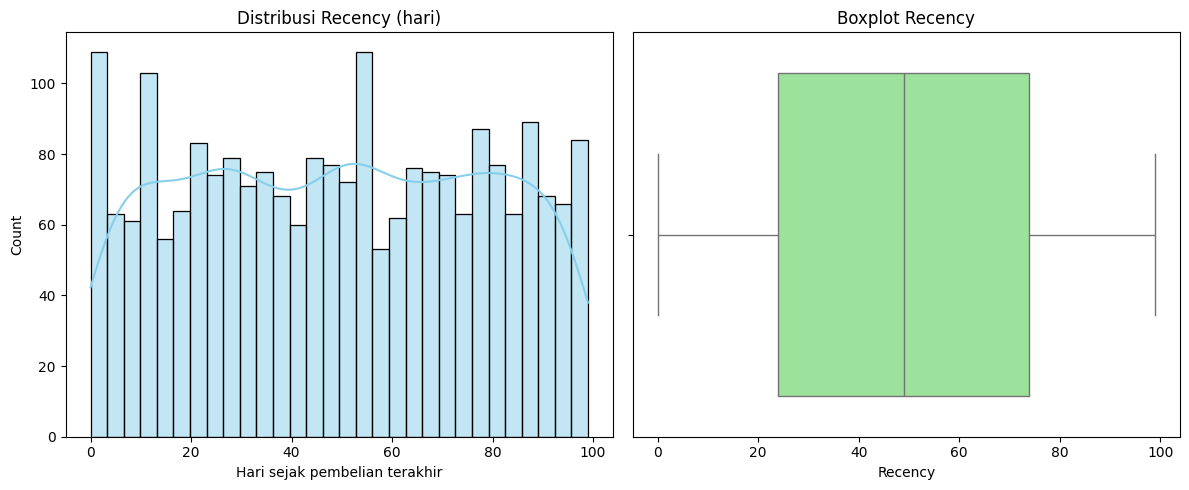

In [203]:
# Statistik deskriptif dan skewness
print(df['Recency'].describe())
print("\nSkewness Recency:", df['Recency'].skew())

# Visualisasi distribusi
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Recency'], kde=True, bins=30, color='skyblue')
plt.title('Distribusi Recency (hari)')
plt.xlabel('Hari sejak pembelian terakhir')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Recency'], color='lightgreen')
plt.title('Boxplot Recency')

plt.tight_layout()
plt.show()

**Interpretasi**
- Distribusi `Recency` hampir simetris dengan skewness mendekati nol, yang artinya pelanggan tersebar cukup merata dari segi waktu terakhir mereka bertransaksi.
- Median dan mean sangat berdekatan, memperkuat bahwa distribusi tidak terlalu condong ke kanan atau kiri.
- Nilai minimum 0 menunjukkan adanya pelanggan yang baru saja melakukan pembelian, sementara nilai maksimum 99 menunjukkan ada juga pelanggan yang sudah sangat lama tidak berbelanja.

**Insight:**
Distribusi ini mengindikasikan bahwa supermarket memiliki **beragam jenis pelanggan**, dari yang sangat aktif hingga yang lama tidak aktif. Hal ini penting untuk dipertimbangkan dalam menyusun strategi kampanye yang **personalized berdasarkan aktivitas terakhir pelanggan**.

### 4.4 NumDealPurchases

=== Jumlah Transaksi Promo ===
count    2216.000000
mean        2.323556
std         1.923716
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        15.000000
Name: NumDealsPurchases, dtype: float64
Skewness Jumlah Transaksi Promo: 2.413636568696112


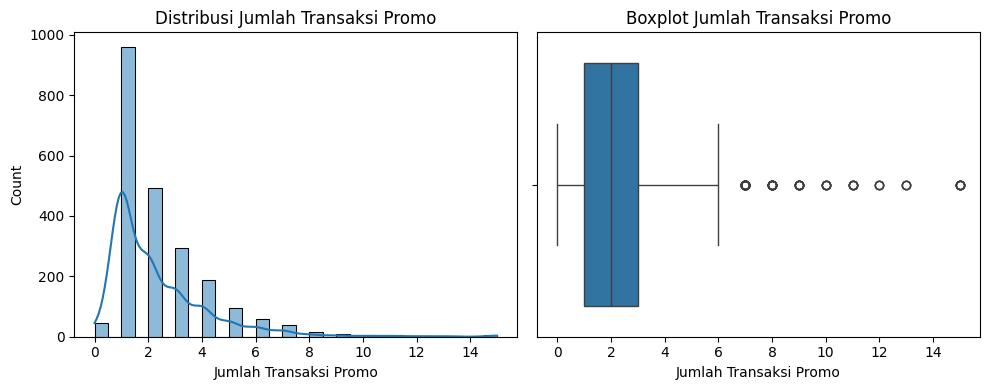

In [204]:
# Statistik deskriptif untuk NumDealsPurchases
print("=== Jumlah Transaksi Promo ===")
print(df_clean['NumDealsPurchases'].describe())
print("Skewness Jumlah Transaksi Promo:", skew(df_clean['NumDealsPurchases']))

# Visualisasi
plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
sns.histplot(df_clean['NumDealsPurchases'], bins=30, kde=True)
plt.title("Distribusi Jumlah Transaksi Promo")
plt.xlabel("Jumlah Transaksi Promo")

plt.subplot(1, 2, 2)
sns.boxplot(x=df_clean['NumDealsPurchases'])
plt.title("Boxplot Jumlah Transaksi Promo")
plt.xlabel("Jumlah Transaksi Promo")

plt.tight_layout()
plt.show()

**Insight**: Jumlah Transaksi Promo (`NumDealsPurchases`)

- **0–3 transaksi promo** merupakan rentang yang paling umum; sekitar 75 % pelanggan melakukan **3 kali atau kurang** dalam dua tahun terakhir.  
- **Outlier** hingga **15 transaksi** menunjukkan adanya pelanggan yang **sangat responsif** terhadap promosi.  
- **Rekomendasi**:  
  - **Segmentasi** berdasarkan frekuensi promo (0–1, 2–3, ≥4 transaksi).  
  - **Tingkatkan engagement** low-frequency dengan jenis promo baru (voucher, cashback).  
  - **Pertahankan loyalitas** high-frequency melalui program eksklusif atau penawaran VIP.  

### 4.5 NumWebVisitsMonth 

=== Kunjungan Web per Bulan ===
count    2216.000000
mean        5.319043
std         2.425359
min         0.000000
25%         3.000000
50%         6.000000
75%         7.000000
max        20.000000
Name: NumWebVisitsMonth, dtype: float64
Skewness Kunjungan Web per Bulan: 0.21789542556468375


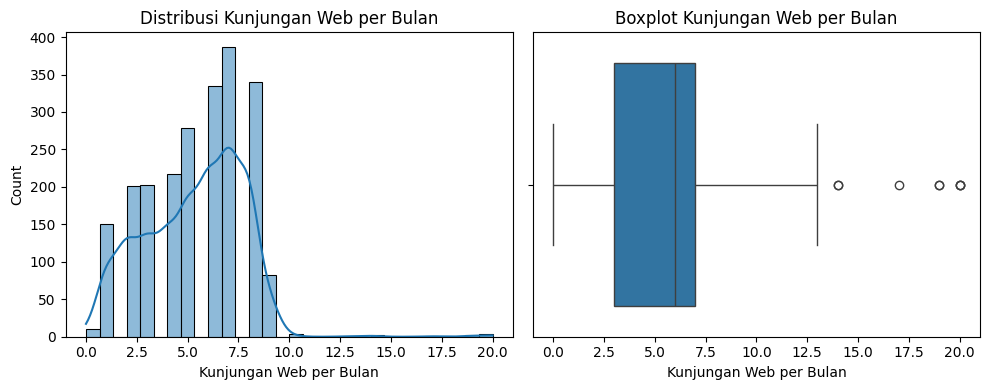

In [205]:
from scipy.stats import skew
import seaborn as sns
import matplotlib.pyplot as plt

# Statistik deskriptif untuk NumWebVisitsMonth
print("=== Kunjungan Web per Bulan ===")
print(df_clean['NumWebVisitsMonth'].describe())
print("Skewness Kunjungan Web per Bulan:", skew(df_clean['NumWebVisitsMonth']))

# Visualisasi
plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
sns.histplot(df_clean['NumWebVisitsMonth'], bins=30, kde=True)
plt.title("Distribusi Kunjungan Web per Bulan")
plt.xlabel("Kunjungan Web per Bulan")

plt.subplot(1, 2, 2)
sns.boxplot(x=df_clean['NumWebVisitsMonth'])
plt.title("Boxplot Kunjungan Web per Bulan")
plt.xlabel("Kunjungan Web per Bulan")

plt.tight_layout()
plt.show()

**Insight:** Kunjungan Web per Bulan (`NumWebVisitsMonth`)

- Sebagian besar pelanggan melakukan **3–7 kunjungan web per bulan** (median = 6, Q1 = 3, Q3 = 7), dengan rata-rata = 5,31 kunjungan.
- Distribusi hampir simetris (skewness = 0,21), menunjukkan bahwa frekuensi kunjungan tidak “bergeser” ke satu sisi—bahkan jumlah pelanggan dengan kunjungan rendah, sedang, dan tinggi relatif proporsional.
- Terdapat pelanggan (outlier) yang melakukan **≥13 kunjungan web per bulan**.
- Perlu dilakukan analisis lanjutan untuk melihat **apakah intensitas kunjungan tinggi ini juga berbanding lurus dengan frekuensi maupun nilai pembelian**.

**Rekomendasi**:  
  - Lakukan **A/B testing** pada elemen situs (landing page, penawaran spesial) untuk meningkatkan rasio kunjungan-ke-pembelian.  

### 4.6 Education

== Jumlah per Tingkat Pendidikan ==
Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64

== Persentase per Tingkat Pendidikan (%) ==
Education
Graduation    50.361011
PhD           21.705776
Master        16.471119
2n Cycle       9.025271
Basic          2.436823
Name: proportion, dtype: float64


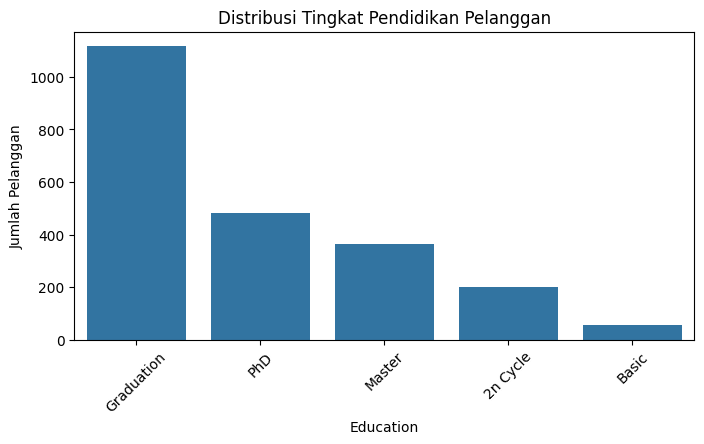

In [206]:
# Statistik deskriptif untuk Education
edu_counts = df_clean['Education'].value_counts()
edu_perc = df_clean['Education'].value_counts(normalize=True) * 100
print("== Jumlah per Tingkat Pendidikan ==")
print(edu_counts)
print("\n== Persentase per Tingkat Pendidikan (%) ==")
print(edu_perc)

# Visualisasi
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
sns.countplot(x='Education', data=df_clean,
              order=edu_counts.index)
plt.title("Distribusi Tingkat Pendidikan Pelanggan")
plt.xlabel("Education")
plt.ylabel("Jumlah Pelanggan")
plt.xticks(rotation=45)
plt.show()

**Insight**:  
- Mayoritas pelanggan memiliki tingkat pendidikan **Graduate (47,4%)** dan **PhD (27,0%)**.  
- Pelanggan dengan pendidikan **Master** dan **2nd Cycle** relatif lebih sedikit, masing-masing **18,2%** dan **7,5%**.

### 4.7. Marital_Status

== Jumlah per Status Pernikahan ==
Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

== Persentase (%) per Status Pernikahan ==
Marital_Status
Married     38.673285
Together    25.857401
Single      21.254513
Divorced    10.469314
Widow        3.429603
Alone        0.135379
Absurd       0.090253
YOLO         0.090253
Name: proportion, dtype: float64


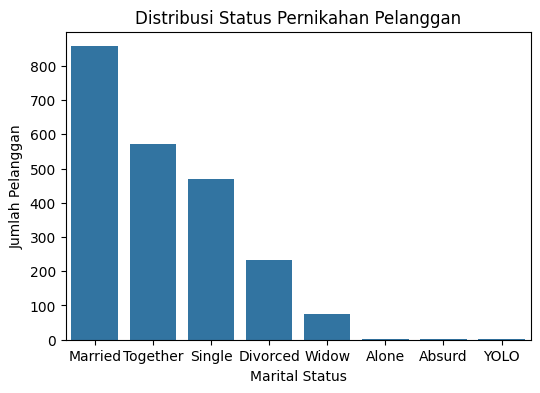

In [207]:
# Statistik deskriptif Marital_Status
ms_counts = df_clean['Marital_Status'].value_counts()
ms_perc   = df_clean['Marital_Status'].value_counts(normalize=True) * 100
print("== Jumlah per Status Pernikahan ==")
print(ms_counts)
print("\n== Persentase (%) per Status Pernikahan ==")
print(ms_perc)

# Visualisasi
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x='Marital_Status', data=df_clean,
              order=ms_counts.index)
plt.title("Distribusi Status Pernikahan Pelanggan")
plt.xlabel("Marital Status")
plt.ylabel("Jumlah Pelanggan")
plt.show()

**Insight**: Status Pernikahan (`Marital_Status`)

- **Married** paling dominan: 857 pelanggan (38,7 %)  
- **Together** kedua terbanyak: 573 pelanggan (25,9 %)  
- **Single** di urutan ketiga: 471 pelanggan (21,3 %)  
- Sisanya: **Divorced** 232 (10,5 %), **Widow** 76 (3,4 %)  
- Kategori sangat minoritas: **Alone** (0,1 %), **Absurd** (0,1 %), **YOLO** (0,1 %) — kemungkinan data entry, dapat digabung ke grup “Other”

**Interpretasi**  
Mayoritas (~64,6 %) pelanggan berstatus “committed” (Married/Together), sementara pelanggan “Single” juga signifikan (21,3 %). Segmentasi menurut status pernikahan perlu mempertimbangkan grup utama (Married/Together), grup single, dan menggabungkan entri langka ke kategori “Other” agar analisis lebih bersih dan actionable.  

## 5. Analisis Inferensial
Dalam tahap ini, kita ingin mengetahui apakah terdapat perbedaan rata-rata pendapatan (Income) antara pelanggan yang merespons campaign dan yang tidak. Metode yang digunakan adalah Independent T-Test, karena kita membandingkan dua kelompok independen terhadap satu variabel numerik.

Langkah-langkah analisis:
1. Memisahkan data berdasarkan nilai Response (0 = Tidak Respon, 1 = Respon).
2.	Melakukan uji-t dua sampel menggunakan fungsi ttest_ind.
3.	Menampilkan nilai t-statistik dan p-value sebagai dasar pengambilan keputusan.
4.	Menampilkan rata-rata pendapatan tiap kelompok untuk memberikan konteks perbedaan.
5.	Menyajikan visualisasi perbandingan rata-rata pendapatan dalam bentuk bar chart.

### 5.1. Uji-T (Independennt T-Test) untuk Income vs Response

In [208]:

# Pisahkan berdasarkan response
inc_yes = df_clean[df_clean['Response']==1]['Income']
inc_no  = df_clean[df_clean['Response']==0]['Income']


# Uji-T untuk Income
t_stat_inc, p_val_inc = ttest_ind(inc_yes, inc_no, equal_var=False)
print("Income vs Response")
print(f" t-statistic = {t_stat_inc:.4f}")
print(f" p-value     = {p_val_inc:.4f}")

Income vs Response
 t-statistic = 6.7032
 p-value     = 0.0000


In [209]:
# Hitung rata-rata Income tiap kelompok
avg_income = df_clean.groupby('Response')['Income'].mean().reset_index()
avg_income.columns = ['Response', 'Rata-rata Income (USD)']
print(avg_income)

   Response  Rata-rata Income (USD)
0         0            50839.132767
1         1            60209.675676


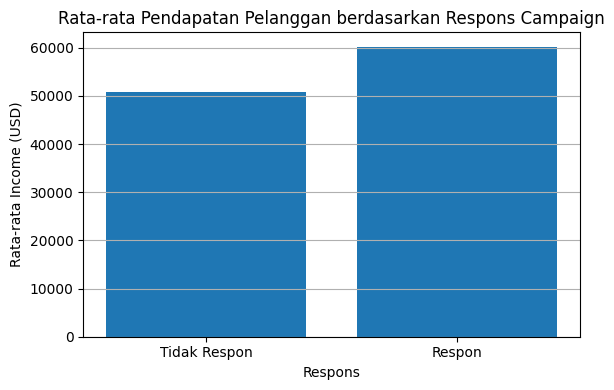

In [210]:
# Ubah label untuk visualisasi
avg_income['Response'] = avg_income['Response'].map({0: 'Tidak Respon', 1: 'Respon'})

# Visualisasi bar chart
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.bar(avg_income['Response'], avg_income['Rata-rata Income (USD)'])
plt.title('Rata-rata Pendapatan Pelanggan berdasarkan Respons Campaign')
plt.ylabel('Rata-rata Income (USD)')
plt.xlabel('Respons')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**Hipotesis**
- **H₀ (null hypothesis)**: Tidak terdapat perbedaan rata-rata pendapatan (`Income`) antara pelanggan yang merespons dan tidak merespons campaign.
- **H₁ (alternatif)**: Terdapat perbedaan rata-rata pendapatan antara pelanggan yang merespons dan yang tidak merespons campaign.

**Hasil Uji Statistik**
- t-statistic = 6.7032  
- p-value     < 0.001

**Keputusan**
Karena p-value (≈0.0000) < α (0.05), maka kita **menolak H₀**. Artinya, terdapat perbedaan yang signifikan secara statistik antara rata-rata pendapatan kedua kelompok pelanggan.

**Insight Bisnis**
Pelanggan yang merespons campaign memiliki rata-rata pendapatan sekitar **USD 60.209**, lebih tinggi dibandingkan pelanggan yang tidak merespons (**USD 50.839**). Visualisasi bar chart juga menunjukkan pola ini secara jelas.

Hal ini menunjukkan bahwa pendapatan—sebagai indikator daya beli—berperan penting dalam kecenderungan pelanggan untuk merespons promosi. Dengan demikian, campaign pemasaran dapat lebih ditargetkan ke pelanggan dengan daya beli lebih tinggi untuk meningkatkan efektivitas promosi.

### 5.2. Uji -T untuk MntWines vs Response

In [211]:
wine_yes = df_clean[df_clean['Response']==1]['MntWines']
wine_no  = df_clean[df_clean['Response']==0]['MntWines']

t_stat_wine, p_val_wine = ttest_ind(wine_yes, wine_no, equal_var=False)
print("MntWines vs Response")
print(f" t-statistic = {t_stat_wine:.4f}")
print(f" p-value     = {p_val_wine:.4f}")

MntWines vs Response
 t-statistic = 9.4954
 p-value     = 0.0000


In [223]:
# Menampilkan rata rata pengeluaran wine tiap kelompok
avg_wine = df_clean.groupby('Response')['MntWines'].mean()
avg_wine.columns = ['Response', 'Rata-rata MntWines (USD)']

# Tampilkan hasilnya
print(avg_wine)

Response
0    270.160382
1    502.615616
Name: MntWines, dtype: float64


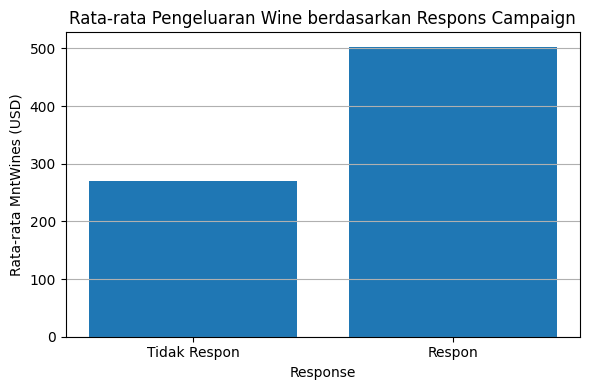

In [213]:
import matplotlib.pyplot as plt

# Hitung rata-rata pengeluaran wine berdasarkan respons
avg_wine = df_clean.groupby('Response')['MntWines'].mean().reset_index()
avg_wine.columns = ['Response', 'Rata-rata MntWines (USD)']

# Ubah label Response menjadi lebih deskriptif
avg_wine['Response'] = avg_wine['Response'].map({0: 'Tidak Respon', 1: 'Respon'})

# Buat bar chart
plt.figure(figsize=(6,4))
plt.bar(avg_wine['Response'], avg_wine['Rata-rata MntWines (USD)'])
plt.title('Rata-rata Pengeluaran Wine berdasarkan Respons Campaign')
plt.ylabel('Rata-rata MntWines (USD)')
plt.xlabel('Response')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**Uji-T: MntWines vs Response**

- **Hipotesis**  
  - H₀: Rata-rata pengeluaran untuk wine (`MntWines`) pelanggan yang merespons = rata-rata pelanggan yang tidak merespons.  
  - H₁: Rata-rata pengeluaran untuk wine berbeda antara kedua grup.

- **Hasil Uji**  
  - t-statistic = 9.4954  
  - p-value     < 0.001  

- **Keputusan**  
  Karena p-value (≈0.0000) < α (0.05), **menolak H₀**. Artinya, terdapat perbedaan yang signifikan secara statistik antara rata-rata pengeluaran wine pada kedua kelompok pelanggan.


- **Insight**  
  Pelanggan yang merespons campaign memiliki rata-rata pengeluaran untuk wine sebesar **USD 502.62**, jauh lebih tinggi dari pelanggan yang tidak merespons (**USD 270.16**). Visualisasi bar chart memperkuat perbedaan ini, mengindikasikan bahwa minat terhadap produk wine—yang bisa menjadi proxy dari preferensi dan loyalitas produk tertentu—berkorelasi dengan respons terhadap promosi. Artinya, pelanggan dengan minat belanja wine yang tinggi lebih potensial untuk ditargetkan dalam campaign berikutnya.

### 5.3. Chi-Square Test untuk Education vs Response

In [214]:

ct = pd.crosstab(df_clean['Education'], df_clean['Response'])
chi2, p_val_chi, dof, expected = chi2_contingency(ct)
print("Education vs Response (Chi-Square)")
print(f" chi2  = {chi2:.4f}")
print(f" p-value = {p_val_chi:.4f}")

Education vs Response (Chi-Square)
 chi2  = 23.1507
 p-value = 0.0001


In [215]:
# Buat crosstab proporsi respons per kategori Education
edu_response_prop = pd.crosstab(df_clean['Education'], df_clean['Response'], normalize='index') * 100
edu_response_prop.columns = ['Tidak Respon (%)', 'Respon (%)']
edu_response_prop = edu_response_prop.reset_index()
display(edu_response_prop)

,Education,Tidak Respon (%),Respon (%)
0,2n Cycle,89.000000,11.000000
1,Basic,96.296296,3.703704
2,Graduation,86.379928,13.620072
3,Master,84.657534,15.342466
4,PhD,79.002079,20.997921


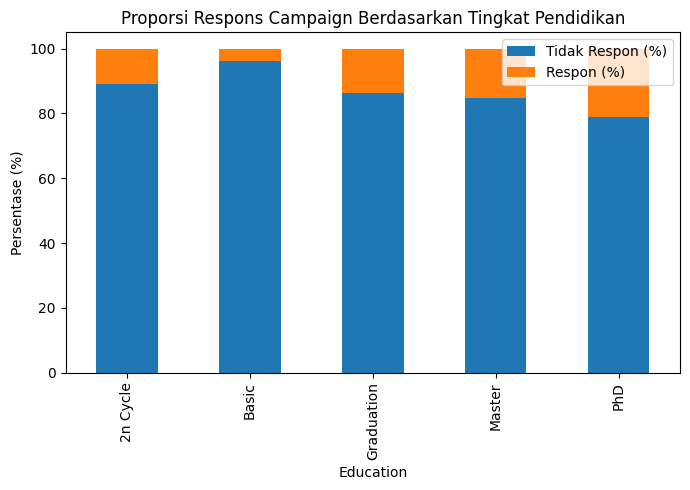

In [216]:
# Visualisasi perbedaan proporsi Respon vs Tidak Respon di tiap Education
edu_response_prop.plot(
    x='Education',
    kind='bar',
    stacked=True,
    figsize=(7,5),
    title='Proporsi Respons Campaign Berdasarkan Tingkat Pendidikan'
)
plt.ylabel('Persentase (%)')
plt.xlabel('Education')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

- **Hipotesis**  
  - H₀: Tingkat pendidikan (`Education`) **independen** terhadap respons kampanye (`Response`).  
  - H₁: Terdapat **asosiasi** antara tingkat pendidikan dan respons kampanye.

- **Hasil Uji**  
  - χ² = 23,1507  
  - p-value = 0,0001  

- **Keputusan**  
  Karena p-value (0,0001) < α (0,05), **menolak H₀**.

- **Insight**  
  Dari grafik dan tabel proporsi, terlihat bahwa tingkat respons pelanggan terhadap campaign berbeda di tiap tingkat pendidikan. Sebagai contoh, pelanggan dengan pendidikan tinggi seperti ‘PhD’ cenderung memiliki persentase respons yang lebih tinggi dibandingkan kategori lain. Hal ini memperkuat hasil uji chi-square sebelumnya yang menyatakan bahwa terdapat asosiasi yang signifikan antara tingkat pendidikan dan kecenderungan merespons promosi.


### 5.4. Chi-Square Test untuk Marital_Status vs Response

In [217]:

ct = pd.crosstab(df_clean['Marital_Status'], df_clean['Response'])
chi2, p_val_chi, dof, expected = chi2_contingency(ct)
print("Marital_Status vs Response (Chi-Square)")
print(f" chi2  = {chi2:.4f}")
print(f" p-value = {p_val_chi:.4f}")

Marital_Status vs Response (Chi-Square)
 chi2  = 53.5067
 p-value = 0.0000


In [218]:
# Hitung total dan proporsi pelanggan yang merespons pada setiap kategori Marital_Status
marital_response_rate = pd.crosstab(df_clean['Marital_Status'], df_clean['Response'], normalize='index') * 100

# Tambahkan nama kolom agar lebih mudah dibaca
marital_response_rate.columns = ['Tidak Respon', 'Respon']

# Tampilkan proporsi
print(marital_response_rate.round(2))

                Tidak Respon  Respon
Marital_Status                      
Absurd                 50.00   50.00
Alone                  66.67   33.33
Divorced               79.31   20.69
Married                88.56   11.44
Single                 77.49   22.51
Together               89.53   10.47
Widow                  76.32   23.68
YOLO                   50.00   50.00


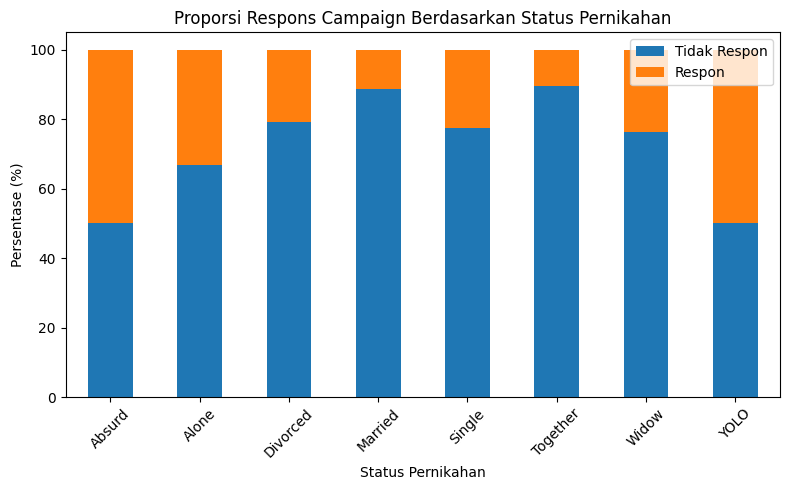

In [219]:
# Visualisasi proporsi respons berdasarkan Marital_Status
marital_response_rate.plot(
    kind='bar',
    stacked=True,
    figsize=(8,5),
    title='Proporsi Respons Campaign Berdasarkan Status Pernikahan'
)
plt.ylabel('Persentase (%)')
plt.xlabel('Status Pernikahan')
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Berdasarkan uji Chi-Square, ditemukan bahwa terdapat asosiasi yang signifikan secara statistik antara status pernikahan pelanggan dan kecenderungan mereka untuk merespons campaign (p-value < 0.001).

Visualisasi proporsi memperlihatkan bahwa kelompok seperti Widow, Single, dan Divorced memiliki persentase respon yang lebih tinggi dibandingkan Married atau Together. Menariknya, kategori unik seperti YOLO dan Absurd memiliki tingkat respons yang seimbang (50:50), meskipun ukurannya kemungkinan kecil. Temuan ini bisa menjadi insight strategis bahwa kampanye bisa disesuaikan untuk lebih menarik segmen tertentu berdasarkan status pernikahan.

## 🧪 Ringkasan Hasil Statistik Inferensial

Berikut penjelasan sederhana tapi tetap detail dari tiga uji statistik yang telah dilakukan:

1. **Income vs Response**  
   - **t-statistic = 6.70**, **p-value < 0.001**  
   - Artinya: rata-rata pendapatan pelanggan yang merespons promo **berbeda secara signifikan** dengan yang tidak.  
   - Kesimpulan: pelanggan berpendapatan lebih tinggi **cenderung lebih responsif** terhadap campaign.

2. **MntWines vs Response**  
   - **t-statistic = 9.50**, **p-value < 0.001**  
   - Artinya: rata-rata pengeluaran untuk wine antara responden dan non-responden **tidak sama secara signifikan**.  
   - Kesimpulan: pelanggan yang menghabiskan lebih banyak untuk wine **lebih mungkin** merespons promo.

3. **Education vs Response (Chi-Square)**  
   - **χ² = 23.15**, **p-value = 0.0001**  
   - Artinya: terdapat **asosiasi bermakna** antara tingkat pendidikan dan respons campaign.  
   - Kesimpulan: proporsi pelanggan yang merespons **bervariasi** di setiap kategori pendidikan.

> 💡 Semua p-value jauh di bawah 0.05, sehingga kita yakin bahwa ketiga fitur ini memiliki **hubungan statistik yang signifikan** dengan respons kampanye.  
>  
> Selanjutnya, kita dapat memformulasikan insight dan rekomendasi bisnis berdasarkan temuan ini.  

## 6. Insight dan Rekomendasi

Dari hasil analisis yang telah dilakukan terhadap data pelanggan supermarket dan respons mereka terhadap campaign, berikut adalah poin-poin temuan utama:

- Dari 2.240 data pelanggan, hanya sekitar 224 pelanggan (10%) yang memberikan respons terhadap campaign.
- Rata-rata pendapatan pelanggan yang merespons campaign lebih tinggi (sekitar USD 60.209) dibandingkan yang tidak merespons (USD 50.839).
- Pelanggan yang merespons campaign memiliki pengeluaran terhadap wine (MntWines) yang lebih tinggi secara signifikan (~502 USD) dibandingkan yang tidak (~270 USD).
- Terdapat asosiasi signifikan antara tingkat pendidikan dan kemungkinan merespons campaign.
- Terdapat perbedaan proporsi respon yang cukup mencolok antar status pernikahan:
  - Status seperti “Divorced” dan “YOLO” memiliki tingkat respons yang jauh lebih tinggi (≥ 20%).
  - Sedangkan pelanggan “Married” dan “Together” cenderung tidak merespons.

### Karakteristik pelanggan yang lebih cenderung merespons campaign:
- Memiliki pendapatan lebih tinggi dari rata-rata (sekitar USD 60K ke atas).
- Pengeluaran untuk wine cukup tinggi, menunjukkan minat pada produk tertentu.
- Berasal dari latar belakang pendidikan tinggi (Graduate dan PhD lebih dominan).
- Status pernikahan yang tidak menikah secara tradisional (Single, Divorced, YOLO, Alone).

---

### Rekomendasi

1. **Targetkan campaign ke pelanggan dengan daya beli tinggi**  
   Pelanggan dengan pendapatan > USD 60.000 lebih responsif terhadap promosi. Segmentasi berbasis income dapat dioptimalkan untuk meningkatkan konversi.

2. **Fokuskan promosi kepada pelanggan dengan pengeluaran tinggi untuk wine**  
   Indikator “MntWines” terbukti signifikan. Pelanggan ini menunjukkan potensi loyalitas terhadap produk dan cocok untuk campaign upselling atau program loyalti.

3. **Gunakan kombinasi atribut perilaku dan demografis untuk segmentasi**  
   Segmentasi berbasis Income, MntWines, Education, dan Marital_Status dapat digabung dalam model klasifikasi untuk meningkatkan akurasi targeting.


Dengan strategi yang lebih terfokus, perusahaan dapat meningkatkan efektivitas campaign marketing dan mengurangi biaya promosi yang tidak menghasilkan konversi.